In [1]:
import numpy as np
import porepy as pp
import scipy.sparse as sps
import sys
sys.path.append("./class")
from Flow_class import Flow
from Transport_class import Transport

In [2]:
mesh_args = {"mesh_size_frac": 0.15, "mesh_size_bound": 0.15}
gb, domain = pp.grid_buckets_2d.benchmark_regular(mesh_args)
parameter={"aperture":1e-3,
          "fracture_perm":1e4,
          "perm":1,
          "f_lambda":lambda x,y,z:math.pi*math.pi*2*math.sin(math.pi*x)*math.sin(math.pi*y),
          "bc_value":[0.0,0.0],
          "bc_type":['dir','dir'],
          "method":"Tpfa"}

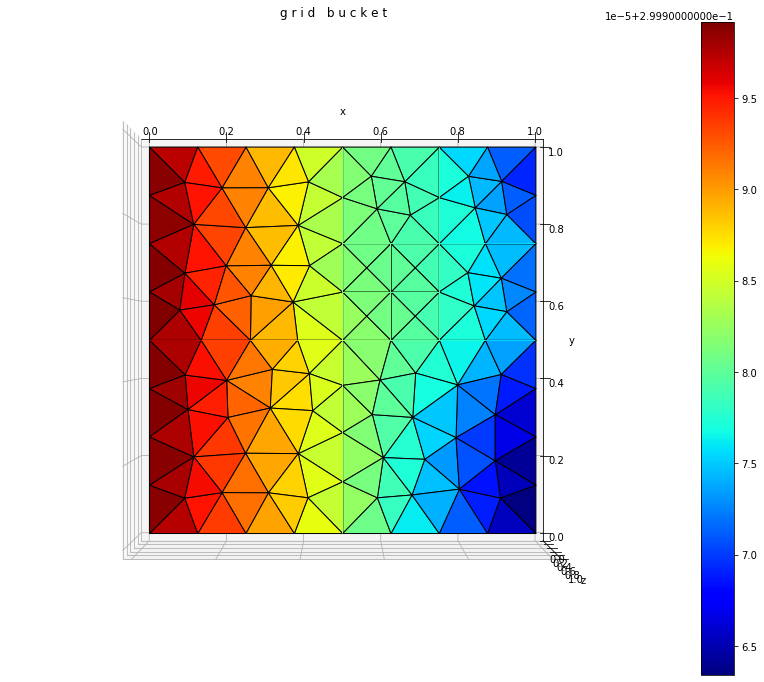

In [3]:
flow=Flow(gb,domain,parameter)
flow.add_data()
flow.discretize()
flow.solve()
flow.plot_pressure()

In [4]:
parameter={
    "aperture":1e-4,
    "por":0.2,
    "por_frac":0.8,
    "time_step":1 / 60,
    "t_max":1 /3,
    "initial_cond":lambda x,y,z:0.0}
Ca_value=[0.0,0.0]
Ca_type=['dir','dir']
CaSiO3_value=[1.0,0.0]
CaSiO3_type=['dir','dir']
Ca="Ca"
CaSiO3="CaSiO3"

transport=Transport(gb,domain,parameter)

In [5]:
reaction_data={"temperature":423,
       "A":1.9e-2,
       "rate_const":0.004466,
       "E":4700,
       "R":8.314,
       "K_eq":10e9,
       "ph":3.5,
       "mass_weight":1}

In [6]:
transport.set_data(Ca_value,Ca_type,Ca)
transport.get_flux(Ca)
transport.discretize(Ca)
lhs_Ca,rhs_source_adv_Ca,rhs_mass_Ca,assembler_Ca=transport.get_transport_lhs_rhs(Ca)#,gb


transport.set_data(CaSiO3_value,CaSiO3_type,CaSiO3)
transport.get_flux(CaSiO3)
transport.discretize(CaSiO3)
lhs_CaSiO3,rhs_source_adv_CaSiO3,rhs_mass_CaSiO3,assembler_CaSiO3=transport.get_transport_lhs_rhs(CaSiO3)

mass
  (0, 0)	0.0011281395367104764
  (1, 1)	0.0011557313480247775
  (2, 2)	0.0012846679807381163
  (3, 3)	0.0016040112537403423
  (4, 4)	0.0013772800196366903
  (5, 5)	0.0013754312433782723
  (6, 6)	0.0013740438131216862
  (7, 7)	0.0014670671437641322
  (8, 8)	0.0011063258372420975
  (9, 9)	0.001107589852068596
  (10, 10)	0.0013071684992472777
  (11, 11)	0.0011301225195090429
  (12, 12)	0.0012096292514058337
  (13, 13)	0.0012826664887492256
  (14, 14)	0.0013299006238486199
  (15, 15)	0.0012993797060060386
  (16, 16)	0.0013079952069756505
  (17, 17)	0.0012597798773541558
  (18, 18)	0.0011310309708900403
  (19, 19)	0.0010817190724411137
  (20, 20)	0.0011745302249575882
  (21, 21)	0.001166418223673641
  (22, 22)	0.0011664182236736397
  (23, 23)	0.0013656692750024597
  (24, 24)	0.0012379180470989126
  :	:
  (202, 202)	9.327028610469707e-06
  (203, 203)	9.761997591572973e-06
  (204, 204)	1.0217245365785882e-05
  (205, 205)	1.0693728432171442e-05
  (206, 206)	1e-05
  (207, 207)	1e-05
  (208

In [7]:
print(lhs_CaSiO3)

  (0, 0)	0.0011281861623927934
  (0, 255)	0.016666666666666666
  (1, 1)	0.0011557880360812875
  (1, 12)	-5.979693626830447e-08
  (1, 231)	0.016666666666666666
  (2, 0)	-3.029915142856628e-08
  (2, 2)	0.0012847123263876438
  (2, 238)	0.016666666666666666
  (3, 1)	-5.668805651004582e-08
  (3, 3)	0.0016040112537403423
  (3, 97)	-1.2159994940604453e-08
  (3, 246)	0.016666666666666666
  (4, 4)	0.0013773582620474813
  (4, 79)	-3.1595262756090034e-08
  (4, 236)	0.016666666666666666
  (5, 5)	0.0013754312433782723
  (5, 9)	-4.216077776897365e-08
  (5, 80)	-3.2975772606969044e-08
  (5, 244)	0.016666666666666666
  (6, 6)	0.0013741047547035107
  (6, 10)	-6.094158182349633e-08
  (7, 7)	0.0014670671437641322
  (7, 18)	-3.631419135952108e-08
  (7, 71)	-2.897335217670142e-08
  (7, 249)	0.016666666666666666
  :	:
  (300, 300)	-0.016666666666666666
  (301, 221)	-1.0997796718677886e-07
  (301, 301)	-0.016666666666666666
  (302, 221)	-7.47999116609628e-08
  (302, 302)	-0.016666666666666666
  (303, 225)	-4

In [8]:
save_every = 1
n_steps = int(np.round(parameter["t_max"] / parameter["time_step"]))

# Initial condition
tracer1 = np.zeros(rhs_source_adv_Ca.size)
assembler_Ca.distribute_variable(
    tracer1, variable_names=[Ca,transport.mortar_variable]
)

tracer2 = np.zeros(rhs_source_adv_CaSiO3.size)
assembler_CaSiO3.distribute_variable(
    tracer2, variable_names=[CaSiO3,transport.mortar_variable]
)


# Exporter
exporter1 = pp.Exporter(gb, file_name="Ca", folder_name="Ca")
export_field1 = ["Ca"]
IEsolver_Ca = sps.linalg.factorized(lhs_Ca)

exporter2= pp.Exporter(gb, file_name="CaSiO3", folder_name="CaSiO3")
export_field2 = ["CaSiO3"]
IEsolver_CaSiO3 = sps.linalg.factorized(lhs_CaSiO3)

/home/dell/.local/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


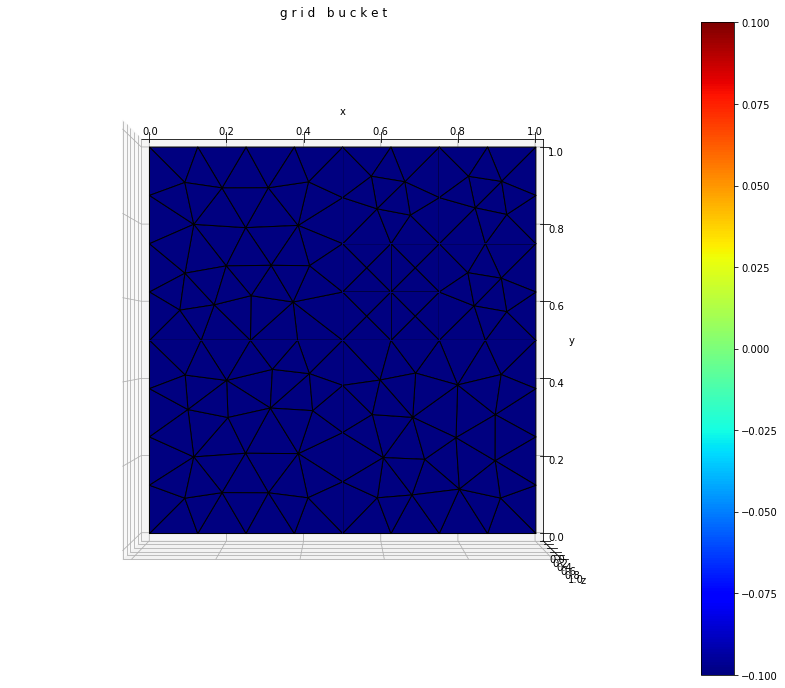

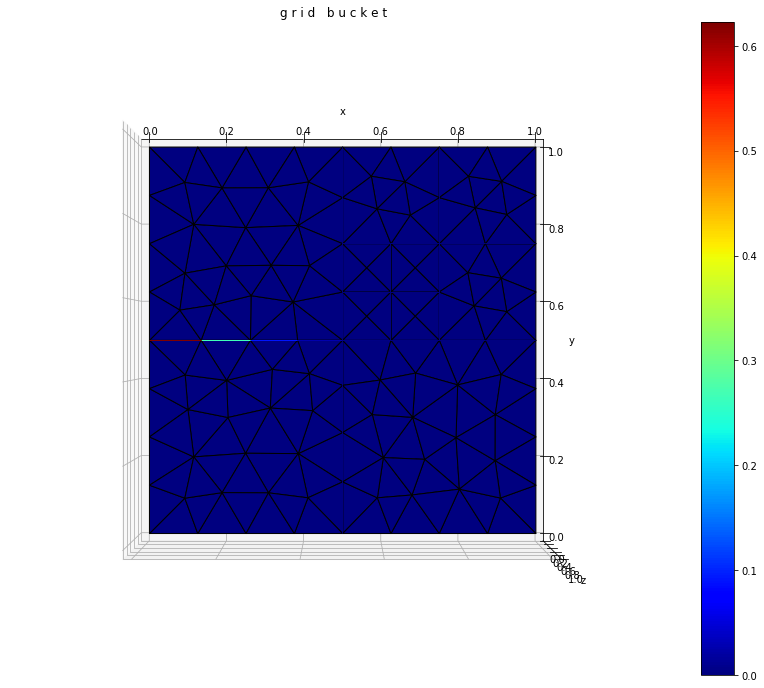

In [9]:
for i in range(n_steps):
    
    if np.isclose(i % save_every, 0):
        # Export existing solution (final export is taken care of below)
        assembler_Ca.distribute_variable(
        tracer1,
        variable_names=[Ca,transport.mortar_variable],
    )
        exporter1.write_vtu(export_field1, time_step=int(i // save_every))
        
        assembler_CaSiO3.distribute_variable(
        tracer2,
        variable_names=[CaSiO3,transport.mortar_variable],
    )
        exporter2.write_vtu(export_field2, time_step=int(i // save_every))
    
    tracer1 = IEsolver_Ca(rhs_mass_Ca * tracer1 + rhs_source_adv_Ca)
    tracer2 = IEsolver_CaSiO3(rhs_mass_Ca * tracer2 + rhs_source_adv_CaSiO3)

    
exporter1.write_vtu(export_field1, time_step=(n_steps // save_every))
time_steps = np.arange(
    0, parameter["t_max"] + parameter["time_step"], save_every * parameter["time_step"]
)
    
exporter2.write_vtu(export_field2, time_step=(n_steps // save_every))
time_steps = np.arange(
    0, parameter["t_max"] + parameter["time_step"], save_every * parameter["time_step"]
)
exporter1.write_pvd(time_steps)
exporter2.write_pvd(time_steps)
transport.plot_tracer(Ca)
transport.plot_tracer(CaSiO3)